In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
# visualization libraries
from matplotlib import pyplot as plt

In [2]:
median=pd.read_csv('medianSalesPrice.csv', dtype={"Bedrooms": int, "RegionName": "string"})

C:\users\betan\anaconda3\envs\PythonTime\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
median.head()

,Bedrooms,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,...,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021
0,1,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,...,689319.0,688401.0,687989.0,686916.0,685278.0,682705.0,681110.0,680490.0,681329.0,681740.0
1,1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,...,217151.0,217353.0,217807.0,218778.0,220062.0,221396.0,222713.0,224034.0,225383.0,226155.0
2,1,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,...,764479.0,762927.0,763024.0,762572.0,762335.0,762696.0,764745.0,766037.0,768289.0,769852.0
3,1,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,...,246589.0,246965.0,247455.0,247958.0,248226.0,248181.0,248364.0,249036.0,250130.0,250644.0
4,1,91940,5,77449,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,...,137762.0,138753.0,139456.0,140111.0,140617.0,142016.0,143976.0,146953.0,149562.0,151943.0


In [4]:
type(median)

pandas.core.frame.DataFrame

In [5]:
median= median[median['RegionName']=='33178']

In [6]:
median.head()

,Bedrooms,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,...,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021
623,1,72480,657,33178,Zip,FL,FL,Doral,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,...,210973.0,209623.0,207865.0,206733.0,207315.0,208198.0,209419.0,209805.0,210270.0,210640.0
19200,2,72480,657,33178,Zip,FL,FL,Doral,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,...,249556.0,249560.0,249134.0,249153.0,249559.0,250467.0,251510.0,252071.0,253238.0,254715.0
45955,3,72480,657,33178,Zip,FL,FL,Doral,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,...,340325.0,340920.0,341534.0,342905.0,344561.0,346361.0,348205.0,349553.0,352206.0,355292.0
74754,4,72480,657,33178,Zip,FL,FL,Doral,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,...,444277.0,444446.0,444955.0,446170.0,447755.0,449881.0,452519.0,455077.0,458819.0,462917.0
101331,5,72480,657,33178,Zip,FL,FL,Doral,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,...,695127.0,694260.0,694655.0,697251.0,698968.0,701111.0,703419.0,706214.0,709939.0,714459.0


In [7]:
median=median.drop(columns=['RegionID','SizeRank','RegionName','RegionType','StateName','State','Metro'])

In [8]:
print(median.dtypes)

Bedrooms        int32
City           object
CountyName     object
1/31/2015     float64
2/28/2015     float64
               ...   
9/30/2020     float64
10/31/2020    float64
11/30/2020    float64
12/31/2020    float64
1/31/2021     float64
Length: 76, dtype: object


In [9]:
median.isnull()

,Bedrooms,City,CountyName,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,...,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021
623,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
19200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45955,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74754,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
null_columns=median.columns[median.isnull().any()]
median[null_columns].isnull().sum()

Series([], dtype: float64)

In [11]:
median = median.fillna(0)

In [12]:
null_columns=median.columns[median.isnull().any()]
median[null_columns].isnull().sum()

Series([], dtype: float64)

In [13]:
medianMelt= pd.melt(median, id_vars=['Bedrooms', 'City', 'CountyName'])

In [14]:
medianMelt

,Bedrooms,City,CountyName,variable,value
0,1,Doral,Miami-Dade County,1/31/2015,219321.0
1,2,Doral,Miami-Dade County,1/31/2015,231300.0
2,3,Doral,Miami-Dade County,1/31/2015,316331.0
3,4,Doral,Miami-Dade County,1/31/2015,460123.0
4,5,Doral,Miami-Dade County,1/31/2015,787990.0
...,...,...,...,...,...
360,1,Doral,Miami-Dade County,1/31/2021,210640.0
361,2,Doral,Miami-Dade County,1/31/2021,254715.0
362,3,Doral,Miami-Dade County,1/31/2021,355292.0
363,4,Doral,Miami-Dade County,1/31/2021,462917.0


In [15]:
medianDummy = pd.get_dummies(medianMelt, columns=['City'])

In [16]:
medianDummy.rename(columns={'variable':'date'},inplace=True)

In [17]:
medianDummy.tail()

,Bedrooms,CountyName,date,value,City_Doral
360,1,Miami-Dade County,1/31/2021,210640.0,1
361,2,Miami-Dade County,1/31/2021,254715.0,1
362,3,Miami-Dade County,1/31/2021,355292.0,1
363,4,Miami-Dade County,1/31/2021,462917.0,1
364,5,Miami-Dade County,1/31/2021,714459.0,1


In [18]:
medianDummy['date']=pd.to_datetime(medianDummy['date'])

In [19]:
medianDummy.groupby(['CountyName','date']).mean()

Bedrooms     value  City_Doral
CountyName        date                                      
Miami-Dade County 2015-01-31         3  403013.0           1
                  2015-02-28         3  403556.8           1
                  2015-03-31         3  403896.6           1
                  2015-04-30         3  404460.0           1
                  2015-05-31         3  405575.6           1
...                                ...       ...         ...
                  2020-09-30         3  391203.6           1
                  2020-10-31         3  393014.4           1
                  2020-11-30         3  394544.0           1
                  2020-12-31         3  396894.4           1
                  2021-01-31         3  399604.6           1

[73 rows x 3 columns]

In [20]:
medianDummy.groupby(['date']).mean()['value']

date
2015-01-31    403013.0
2015-02-28    403556.8
2015-03-31    403896.6
2015-04-30    404460.0
2015-05-31    405575.6
                ...   
2020-09-30    391203.6
2020-10-31    393014.4
2020-11-30    394544.0
2020-12-31    396894.4
2021-01-31    399604.6
Name: value, Length: 73, dtype: float64

In [21]:
timestamps = medianDummy.groupby(['date']).mean()['value'].index.tolist()

In [22]:
X=list(range(1,len(medianDummy.groupby(['date']).mean()['value'])+1)) # keep brand separate for another time and explain dummy variables, or encoding
#X=[str(x) for x in timestamps]
X=np.array(X)
X=X.reshape(-1,1)
y=medianDummy.groupby(['date']).mean()['value'].values
split_num=int(len(medianDummy.groupby(['date']).mean()['value'].values)*.70)
X_train, X_test=X[:split_num],X[split_num:]
y_train, y_test=y[:split_num],y[split_num:]

In [23]:
len(y),len(X)

(73, 73)

In [24]:
y_test

array([396457.2, 396209.2, 396304.8, 395417. , 394303. , 392759.8,
       391646.4, 390422. , 389341.8, 388330.8, 388743.8, 388730.4,
       388051.6, 387761.8, 387628.6, 388442.4, 389631.6, 391203.6,
       393014.4, 394544. , 396894.4, 399604.6])

In [25]:
regr=linear_model.LinearRegression()
re_res=regr.fit(X_train,y_train)
# print(re_res.coef_)
y_predict=regr.predict(X_test)

(array([3., 2., 2., 2., 2., 2., 2., 2., 2., 3.]),
 array([395545.45239216, 396032.94985098, 396520.4473098 , 397007.94476863,
        397495.44222745, 397982.93968627, 398470.4371451 , 398957.93460392,
        399445.43206275, 399932.92952157, 400420.42698039]),
 <BarContainer object of 10 artists>)

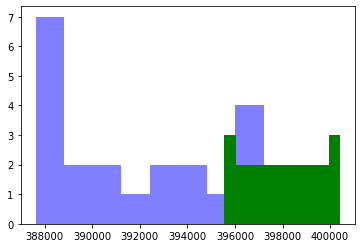

In [26]:
fig,ax=plt.subplots()
plt.hist(y_test,color='blue',alpha=0.5)
plt.hist(y_predict,color='green')

In [34]:
y_test

array([396457.2, 396209.2, 396304.8, 395417. , 394303. , 392759.8,
       391646.4, 390422. , 389341.8, 388330.8, 388743.8, 388730.4,
       388051.6, 387761.8, 387628.6, 388442.4, 389631.6, 391203.6,
       393014.4, 394544. , 396894.4, 399604.6])

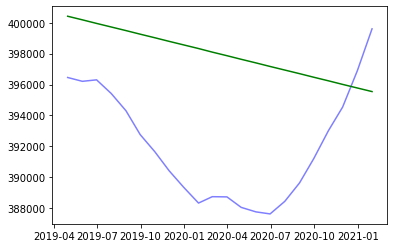

In [44]:
import matplotlib.dates as fmtdates
fig,ax=plt.subplots()
plt.plot(timestamps[51:],y_test,color='blue',alpha=0.5)
plt.plot(timestamps[51:],y_predict,color='green')
#fmt = fmtdates.DateFormatter('%d')
#ax.xaxis.set_major_formatter(fmt)
#Find to julian calendar function 'Dec 12 2020'

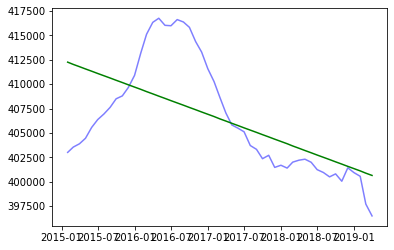

In [45]:
fig,ax=plt.subplots()
plt.plot(timestamps[:51],y_train,color='blue',alpha=0.5)
plt.plot(timestamps[:51],regr.predict(X_train),color='green')

In [29]:
# features=medianDummy.columns[4:].tolist()
# features.append('Bedrooms')

In [46]:
X=medianDummy[features] # keep brand separate for another time and explain dummy variables, or encoding
y=medianDummy['value']

In [35]:
# Training/Test Data
# adjust for random picks when splitting
# wish to shuffle in case data is orderd by brand, which will throw things off
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    shuffle=True,
                                                    random_state=42)

In [36]:
split_num=int(len(X)*.70)

In [37]:
# change out splitter to take time into account
X_train, X_test=X[:split_num],X[split_num:]
y_train, y_test=y[:split_num],y[split_num:]

In [38]:
regr=linear_model.LinearRegression()
re_res=regr.fit(X_train,y_train)
# print(re_res.coef_)
y_predict=regr.predict(X_test)

In [39]:
y_predict[0]

400420.42698039213

In [40]:
y_predict

array([400420.42698039, 400188.28533333, 399956.14368627, 399724.00203922,
       399491.86039216, 399259.7187451 , 399027.57709804, 398795.43545098,
       398563.29380392, 398331.15215686, 398099.0105098 , 397866.86886275,
       397634.72721569, 397402.58556863, 397170.44392157, 396938.30227451,
       396706.16062745, 396474.01898039, 396241.87733333, 396009.73568627,
       395777.59403922, 395545.45239216])

In [41]:
y_test

array([396457.2, 396209.2, 396304.8, 395417. , 394303. , 392759.8,
       391646.4, 390422. , 389341.8, 388330.8, 388743.8, 388730.4,
       388051.6, 387761.8, 387628.6, 388442.4, 389631.6, 391203.6,
       393014.4, 394544. , 396894.4, 399604.6])

In [42]:
print(f"{mean_squared_error(y_test,y_predict):,.2f}")

48,607,007.31
